# **Using Neural Networks to Solve Partial Differential Equations**


In this notebook, I will be putting all the codes which were used to get the solutions and plots of the Partial Differntial Equations

**ANALYTIC METHOD**

---



> In this first part, I will be using analytic methods to solve and plot the solutions


In [16]:
print("Analytically solving the 2degree Laplace equation")

import numpy as np
import matplotlib.pyplot as plt

# Defining the boundry functions

def boundrycon(x):
  return x*(1 -x)*(4*x + 0.1)

def boundrycon1(x):
  return np.sin(10*(np.pi)*x)

def boundrycond2(x):
  if (x<3*(np.pi/4)):
    return x
  else:
    return (np.pi - x)*3

# Lower bound and upper bound array
lb = np.array([0.0, 0.0])
ub = np.array([1.0, 1.0])

epsilon = 10**-3           # Value of the small step
noi = int((ub[0])/epsilon) # number of iterations
x = np.linspace(0,ub[0], noi)

Fx = np.zeros(noi)
# for i in range(noi):      # This way of defining is useful when the function is non differntiable
#   Fx[i] = intifun1(x[i])
Fx = boundrycon(x)          # Making an array of values of the function at various points

# Br is an array with the values of fourier coefficients:
# We take the function only till N eigenfunctions
N = 50
Br = np.ones(N)
for i in range(1,N+1):
  Br[i-1] = (np.sum(Fx*(np.sin(i*(np.pi)*x))))*epsilon
  Br[i-1] = (Br[i-1])*(2/np.sinh(i*np.pi))
Br = Br[:, np.newaxis]

Analytically solving the 2degree Laplace equation


Text(0.5, 0.92, 'surface')

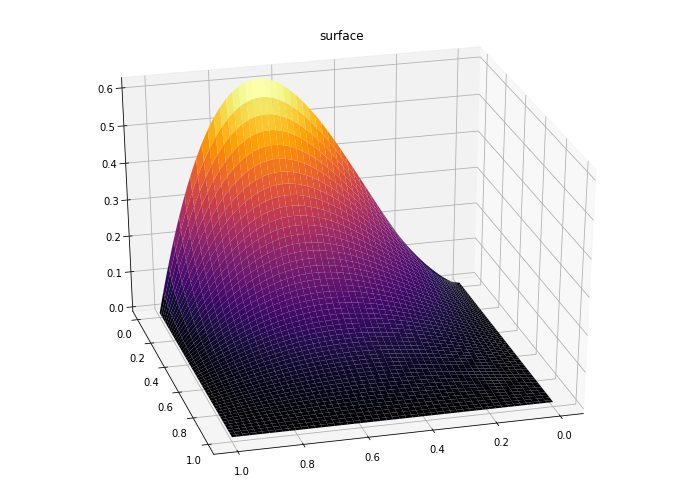

In [18]:
# Number of plotting points
M = 200
x = np.linspace(lb[0], ub[0], M)
y = np.linspace(lb[1], ub[1], M)

X,Y = np.meshgrid(x,y)

# The membrane function takes a messhgrid as input and gives a matrix of corresponding z values
def membrane(X,Y):
  n, m = X.shape
  Z = np.zeros((n,m))     # Making the required matrix  
  for i in range(1, N+1):
    Z = Z + Br[i-1]*(np.sin(i*np.pi*Y))*(np.sinh(i*np.pi*(1- X)))
  return Z

Z = membrane(X,Y)

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.view_init(azim=75)
ax.plot_surface(Y, X, Z, cmap = 'inferno' )
fig.set(figwidth = 12, figheight = 9)
ax.set_title('surface')

In [19]:
print("For the sin boundry condition")

def boundrycon1(x):
  return np.sin(10*(np.pi)*x)

epsilon = 10**-3           
noi = int((ub[0])/epsilon) 
x = np.linspace(0,ub[0], noi)

Fx = np.zeros(noi)
Fx = boundrycon1(x)

N = 50
Br = np.ones(N)
for i in range(1,N+1):
  Br[i-1] = (np.sum(Fx*(np.sin(i*(np.pi)*x))))*epsilon
  Br[i-1] = (Br[i-1])*(2/np.sinh(i*np.pi))
Br = Br[:, np.newaxis]


For the sin boundry condition


Text(0.5, 0.92, 'surface')

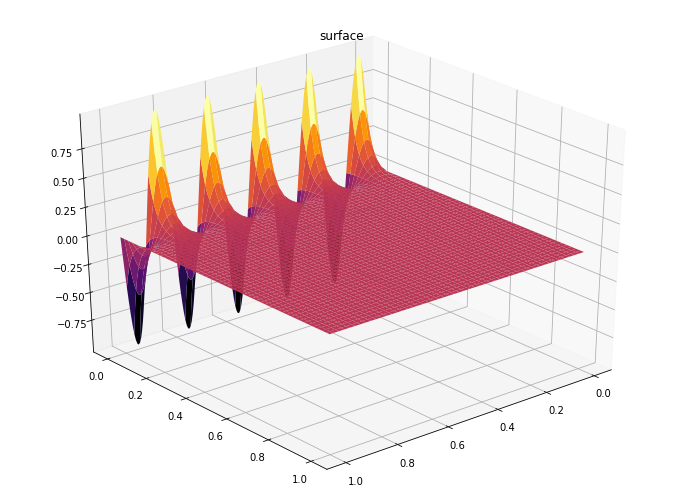

In [20]:
M = 200
x = np.linspace(lb[0], ub[0], M)
y = np.linspace(lb[1], ub[1], M)

X,Y = np.meshgrid(x,y)

def membrane(X,Y):
  n, m = X.shape
  Z = np.zeros((n,m))     
  for i in range(1, N+1):
    Z = Z + Br[i-1]*(np.sin(i*np.pi*Y))*(np.sinh(i*np.pi*(1- X)))
  return Z

Z = membrane(X,Y)

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.view_init(azim=50)
ax.plot_surface(Y, X, Z, cmap = 'inferno' )
fig.set(figwidth = 12, figheight = 9)
ax.set_title('surface')

**NUMERICAL METHOD**


---



> In the numerical method, I will be using the method of finite differnce to solve and plot the Partial Differential Equation.



Numerically solving Laplace Equation


Text(0.5, 0.92, 'surface')

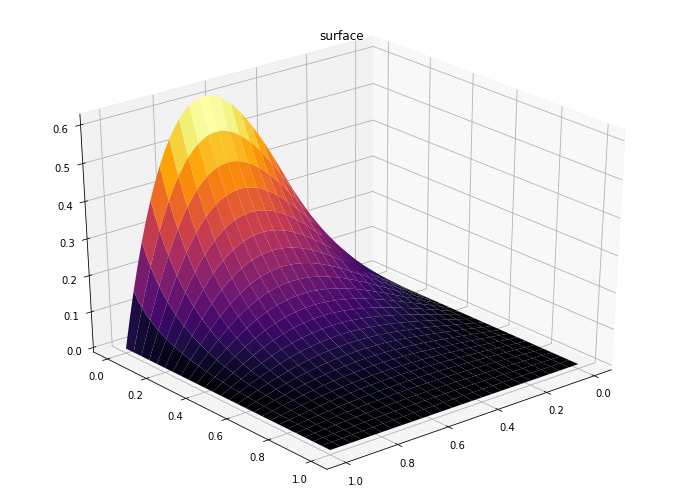

In [22]:
print("Numerically solving Laplace Equation")

# We define the boundry condition for the drichlet conditon
def boundrycond(x):
    return x*(1 -x)*(4*x + 0.1)

# We will make a 51X51 matrix for the mesh
n = 50
m = 50
matrix = np.zeros((n+1,m+1))
array = np.linspace(0,1,n+1)
# As all other bondaries are zero and all the points are initially set to 0, we only have to set the last boundry
matrix[0] = boundrycond(array)

# We will run the iteration for 500 turns
N = 500
for k in range(N):
    for i in range(1,n):
        for j in range(1,m):
          # The value of the point is equal to the average of its 4 neighbours for laplace approximation.
            matrix[i][j] = 1/4*(matrix[i-1][j]+matrix[i+1][j]+matrix[i][j-1]+matrix[i][j+1])

import matplotlib.pyplot as plt
x = array
y = array
X,Y = np.meshgrid(x,y)

# Plottin the Graph
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.view_init(azim=50)
ax.plot_surface(X, Y, matrix, cmap = 'inferno')
fig.set(figwidth = 12, figheight = 9)
ax.set_title('surface')

Numerically solving Laplace Equation


Text(0.5, 0.92, 'surface')

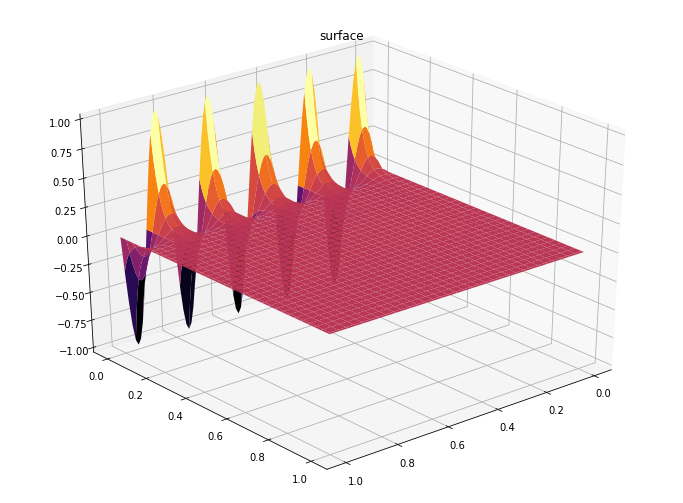

In [29]:
print("Numerically solving Laplace Equation")
def boundrycond(x):
    return np.sin(10*np.pi*x)

n = 100
m = 100
matrix = np.zeros((n+1,m+1))
array = np.linspace(0,1,n+1)
matrix[0] = boundrycond(array)

N = 500
for k in range(N):
    for i in range(1,n):
        for j in range(1,m):
            matrix[i][j] = 1/4*(matrix[i-1][j]+matrix[i+1][j]+matrix[i][j-1]+matrix[i][j+1])

import matplotlib.pyplot as plt
x = array
y = array
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.view_init(azim = 50)
ax.plot_surface(X, Y, matrix, cmap = 'inferno')
fig.set(figwidth = 12, figheight = 9)
ax.set_title('surface')


**Neural Network Method**


---



> In the method, I am going to use neural networks to train the net on various boundry points for boundry conditions and internal points for satisfying the PDE.

In [2]:
######################## Solving a simple Laplace equation 

import tensorflow as tf
import numpy as np

DTYPE='float32' 
tf.keras.backend.set_floatx(DTYPE)

pi = tf.constant(np.pi, dtype=DTYPE) 
#pi = 3.14159265358979

# Defining boundry:
def boundryfun(y):
  return  y*(1 -y)*(4*y + 0.1) # y*(1-y)  #tf.sin(10*pi*y) # only 2 cycles ie y = 0 to 4pi

def boundryfun2(x,y):   # Boundry function 2
  n = x.shape[0]
  return tf.zeros((n,1), dtype=DTYPE)  # We make (n,1) matrices with n rows and 1 columns for output

def residual(x, y, z, z_x, z_y, z_xx, z_yy):
  return z_xx + z_yy


######################## Scaled down data points

# Setting Data points:
N_b = 500     
N_r = 10000

# Setting Boundry:    We have normalised all the boundraies of the function. Imp for optimal output
xmin = 0.0
xmax = 1.0
ymin = 0.0
ymax = 1.0

# Putting them in into two boundaries, this will help us in making the scaling factor
lb = tf.constant([xmin, ymin], dtype = DTYPE)
ub = tf.constant([xmax, ymax], dtype = DTYPE)

tf.random.set_seed(0) ## This function is a random number generator and needs a seed to produce random number

# Boundry Value data
x_b = tf.ones((N_b, 1), dtype = DTYPE)*lb[0]
y_b = tf.random.uniform((N_b, 1), lb[1], ub[1], dtype = DTYPE)  # random but uniform distribution
X_b = tf.concat([y_b, x_b], axis = 1)
z_b = boundryfun(y_b)                      # y_b is a (n,1) matrix, so is z_b 

# Boundry Value1 and 2 data
x_b1 = tf.random.uniform((N_b, 1), lb[0], ub[0], dtype = DTYPE)
y_b1 = tf.ones((N_b, 1), dtype = DTYPE)*lb[1]
X_b1 = tf.concat([y_b1, x_b1], axis = 1)   # concat function adds the two horizontally as axis = 1, column
z_b1 = tf.zeros((N_b, 1), dtype = DTYPE)

x_b2 = tf.random.uniform((N_b, 1), lb[0], ub[0], dtype = DTYPE)
y_b2 = tf.ones((N_b, 1), dtype = DTYPE)*ub[1]
X_b2 = tf.concat([y_b2, x_b2], axis = 1)
z_b2 = tf.zeros((N_b, 1), dtype = DTYPE)

x_b3 = tf.ones((N_b, 1), dtype = DTYPE)*ub[0]
y_b3 = tf.random.uniform((N_b, 1), lb[1], ub[1], dtype = DTYPE)
X_b3 = tf.concat([y_b3, x_b3], axis = 1)
z_b3 = tf.zeros((N_b, 1), dtype = DTYPE)

# Residual Points (Coallocation Points)
x_r = tf.random.uniform((N_r,1), lb[0], ub[0], dtype=DTYPE)   # Random but normally distributed numbers
y_r = tf.random.uniform((N_r,1), lb[1], ub[1], dtype=DTYPE)
X_r = tf.concat([y_r, x_r], axis = 1)

# Net data
X_data = [X_b, X_b1, X_b2, X_b3]
Z_data = [z_b, z_b1, z_b2, z_b3]

[Text(0.5, 0, '$y$'), Text(0.5, 0, '$x$')]

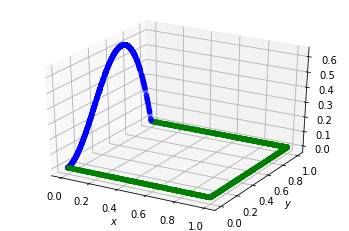

In [15]:
import matplotlib.pyplot as plt

#Xb, Yb = np.meshgrid()

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(x_b, y_b, z_b, color = 'blue')
ax.scatter3D(x_b1, y_b1, z_b1, color = 'green')
ax.scatter3D(x_b2, y_b2, z_b2, color = 'green')
ax.scatter3D(x_b3, y_b3, z_b3, color = 'green')
ax.set(xlabel = '$x$', ylabel ='$y$' )

In [4]:
# Setting up the neural network
def init_model(num_hidden_layers=9, num_neurons_per_layer=20):
    # Initialize a feedforward neural network
    model = tf.keras.Sequential() # Sequential groups a linear stack of layers into a tf.keras.Model

    # Input is two-dimensional (x and y)
    model.add(tf.keras.Input(2))  # Adding the input layer

    # Introduce a scaling layer to map input to [lb, ub], for the neural network to work properly
    scaling_layer = tf.keras.layers.Lambda(lambda x: 2.0*(x - lb)/(ub - lb) - 1.0) #? how is it working?
    # The tf.keras.layers.Lambda is used to make a layer with any lambda function converter.
    #  We use a min max scaling method as it is used in tanh function
    model.add(scaling_layer)  # We make and add the scaling layer 

    # Append hidden layers
    for i in range(num_hidden_layers):    # Neurons per layer = 20, activation function = tanh,  
        model.add(tf.keras.layers.Dense(num_neurons_per_layer,activation=tf.keras.activations.get('tanh'),
                                        kernel_initializer='glorot_normal'))  #

    # Output is one-dimensional
    model.add(tf.keras.layers.Dense(1))   
    
    return model

In [5]:
######################## Getting the residual
def get_residual(model, X_r):

  # We use the gradient tape to get tht gradients
  with tf.GradientTape(persistent = True) as tape:
    # Split t and x to compute partial derivatives
    y, x = X_r[:, 0:1], X_r[:,1:2] 

    # Variables t and x are watched during tape
    # to compute derivatives u_t and u_x
    tape.watch(y)
    tape.watch(x)

    # Determine residual 
    z = model(tf.stack([y[:,0], x[:,0]], axis=1)) 

    # Compute gradient u_x within the GradientTape
    # since we need second derivatives
    z_x = tape.gradient(z, x)   
    z_y = tape.gradient(z, y)

  z_yy = tape.gradient(z_y, y)
  z_xx = tape.gradient(z_x, x)

  del tape

  return residual(x, y, z, z_x, z_y, z_xx, z_yy)

##################################### Calculating the loss function:


def compute_loss(model, X_r, X_data, Z_data, lmbd = 10**-5):

  # Compute residual loss:
  r = get_residual(model, X_r)          # Reduce mean calculates the mean of all the points
  rloss = tf.reduce_mean(tf.square(r))  # The residual loss is the square of r

  loss = lmbd*(rloss)

  # Boundry loss:
  for i in range(len(X_data)):
      Z_pred = model(X_data[i])   # The predicted value:
      loss += tf.reduce_mean(tf.square(Z_data[i] - Z_pred))
    
  return loss

########################################### Getting gradients
def get_grad(model, X_r, X_data, Z_data):
    
    with tf.GradientTape(persistent=True) as tape:  
        # This tape is for derivatives with respect to trainable variables
        tape.watch(model.trainable_variables)
        loss = compute_loss(model, X_r, X_data, Z_data)

    g = tape.gradient(loss, model.trainable_variables)
    del tape

    return loss, g

In [6]:
########################################### Initialising the model
# Initialize model aka u_\theta
model = init_model()

# We choose a piecewise decay of the learning rate, i.e., the
# step size in the gradient descent type algorithm
# the first 1000 steps use a learning rate of 0.01
# from 1000 - 3000: learning rate = 0.001
# from 3000 onwards: learning rate = 0.0005

lr = tf.keras.optimizers.schedules.PiecewiseConstantDecay([1000,3000],[1e-2,1e-3,5e-4])

# Choose the optimizer
optim = tf.keras.optimizers.Adam(learning_rate=lr)

########################################### Training the model
from time import time

# Define one training step as a TensorFlow function to increase speed of training
@tf.function
def train_step():
    # Compute current loss and gradient w.r.t. parameters
    loss, grad_theta = get_grad(model, X_r, X_data, Z_data)
    
    # Perform gradient descent step
    optim.apply_gradients(zip(grad_theta, model.trainable_variables))
    
    return loss

# Number of training epochs
N = 5000
hist = []

# Start timer
t0 = time()

for i in range(N+1):
    
    loss = train_step()
    
    # Append current loss to hist
    hist.append(loss.numpy())
    
    # Output current loss after 50 iterates
    if i%50 == 0:
        print('It {:05d}: loss = {:10.8e}'.format(i,loss))
        
# Print computation time
print('\nComputation time: {} seconds'.format(time()-t0))
###########################################

It 00000: loss = 2.60212451e-01
It 00050: loss = 5.27910888e-03
It 00100: loss = 6.07813068e-04
It 00150: loss = 3.51859897e-04
It 00200: loss = 3.11629032e-04
It 00250: loss = 4.19222430e-04
It 00300: loss = 2.22734641e-04
It 00350: loss = 1.82387565e-04
It 00400: loss = 1.54977344e-04
It 00450: loss = 1.37330222e-04
It 00500: loss = 4.44298901e-04
It 00550: loss = 1.88611535e-04
It 00600: loss = 1.38289251e-04
It 00650: loss = 1.10118126e-04
It 00700: loss = 9.12241812e-05
It 00750: loss = 7.70472543e-05
It 00800: loss = 2.28149141e-03
It 00850: loss = 2.72500591e-04
It 00900: loss = 1.22570898e-04
It 00950: loss = 8.03573785e-05
It 01000: loss = 6.07727488e-05
It 01050: loss = 5.92294782e-05
It 01100: loss = 5.79761545e-05
It 01150: loss = 5.67505122e-05
It 01200: loss = 5.55539082e-05
It 01250: loss = 5.43873102e-05
It 01300: loss = 5.32515915e-05
It 01350: loss = 5.21465518e-05
It 01400: loss = 5.10730752e-05
It 01450: loss = 5.00305105e-05
It 01500: loss = 4.90186103e-05
It 01550

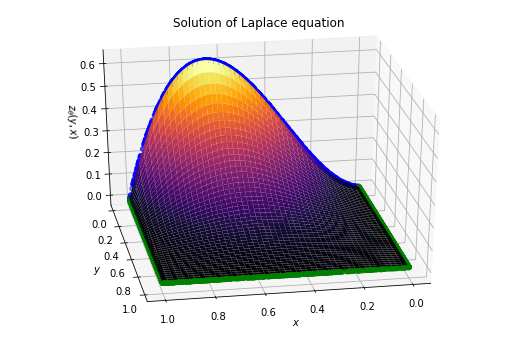

In [13]:
############################# Plotting the result:
from mpl_toolkits.mplot3d import Axes3D

# Set up meshgrid
N = 600
yspace = np.linspace(lb[0], ub[0] , N + 1)
xspace = np.linspace(lb[1], ub[1] , N + 1)
Y, X = np.meshgrid(yspace, xspace)
Xgrid = np.vstack([Y.flatten(),X.flatten()]).T  # What is vstack and flatten

# Determine predictions of z(t, x)
zpred = model(tf.cast(Xgrid,DTYPE))   # What does tf.cast do?

# Reshape upred
Z = zpred.numpy().reshape(N+1,N+1)  # Why and how is it being reshaped

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y, X, Z, cmap='inferno');
ax.view_init(35,35)

ax.scatter3D(y_b, x_b, z_b, color = 'blue')
ax.scatter3D(y_b1, x_b1, z_b1, color = 'green')
ax.scatter3D(y_b2, x_b2, z_b2, color = 'green')
ax.scatter3D(y_b3, x_b3, z_b3, color = 'green')


ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z_\\theta(y,x)$')
ax.set_title('Solution of Laplace equation');
ax.view_init(azim = 80)

Now, we will use the PINN model to solve the laplace equation with sin as boundry condition

In [1]:
######################## Solving a simple Laplace equation 

import tensorflow as tf
import numpy as np

DTYPE='float32' 
tf.keras.backend.set_floatx(DTYPE)

pi = tf.constant(np.pi, dtype=DTYPE) 
# Defining boundry:
def boundryfun(y):
  return  tf.sin(10*pi*y) 

def boundryfun2(x,y):   
  n = x.shape[0]
  return tf.zeros((n,1), dtype=DTYPE)  

def residual(x, y, z, z_x, z_y, z_xx, z_yy):
  return z_xx + z_yy

# Setting Data points:
N_b = 500     
N_r = 10000

# Setting Boundry:    
xmin = 0.0
xmax = 1.0
ymin = 0.0
ymax = 1.0

lb = tf.constant([xmin, ymin], dtype = DTYPE)
ub = tf.constant([xmax, ymax], dtype = DTYPE)

tf.random.set_seed(0) 
# Boundry Value data
x_b = tf.ones((N_b, 1), dtype = DTYPE)*lb[0]
y_b = tf.random.uniform((N_b, 1), lb[1], ub[1], dtype = DTYPE)  
X_b = tf.concat([y_b, x_b], axis = 1)
z_b = boundryfun(y_b)                      
# Boundry Value1 and 2 data
x_b1 = tf.random.uniform((N_b, 1), lb[0], ub[0], dtype = DTYPE)
y_b1 = tf.ones((N_b, 1), dtype = DTYPE)*lb[1]
X_b1 = tf.concat([y_b1, x_b1], axis = 1)   
z_b1 = tf.zeros((N_b, 1), dtype = DTYPE)

x_b2 = tf.random.uniform((N_b, 1), lb[0], ub[0], dtype = DTYPE)
y_b2 = tf.ones((N_b, 1), dtype = DTYPE)*ub[1]
X_b2 = tf.concat([y_b2, x_b2], axis = 1)
z_b2 = tf.zeros((N_b, 1), dtype = DTYPE)

x_b3 = tf.ones((N_b, 1), dtype = DTYPE)*ub[0]
y_b3 = tf.random.uniform((N_b, 1), lb[1], ub[1], dtype = DTYPE)
X_b3 = tf.concat([y_b3, x_b3], axis = 1)
z_b3 = tf.zeros((N_b, 1), dtype = DTYPE)

# Residual Points (Coallocation Points)
x_r = tf.random.uniform((N_r,1), lb[0], ub[0], dtype=DTYPE)   
y_r = tf.random.uniform((N_r,1), lb[1], ub[1], dtype=DTYPE)
X_r = tf.concat([y_r, x_r], axis = 1)

# Net data
X_data = [X_b, X_b1, X_b2, X_b3]
Z_data = [z_b, z_b1, z_b2, z_b3]

[Text(0.5, 0, '$y$'), Text(0.5, 0, '$x$')]

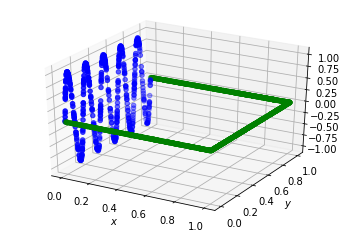

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(x_b, y_b, z_b, color = 'blue')
ax.scatter3D(x_b1, y_b1, z_b1, color = 'green')
ax.scatter3D(x_b2, y_b2, z_b2, color = 'green')
ax.scatter3D(x_b3, y_b3, z_b3, color = 'green')
ax.set(xlabel = '$x$', ylabel ='$y$' )


In [3]:
# Setting up the neural network
def init_model(num_hidden_layers=9, num_neurons_per_layer=20):
    model = tf.keras.Sequential() 
    model.add(tf.keras.Input(2))  
    scaling_layer = tf.keras.layers.Lambda(lambda x: 2.0*(x - lb)/(ub - lb) - 1.0) 
    model.add(scaling_layer)  
    for i in range(num_hidden_layers):     
        model.add(tf.keras.layers.Dense(num_neurons_per_layer,activation=tf.keras.activations.get('tanh'),
                                        kernel_initializer='glorot_normal'))  #

    model.add(tf.keras.layers.Dense(1))   
    return model

In [4]:
######################## Getting the residual
def get_residual(model, X_r):

  with tf.GradientTape(persistent = True) as tape:
    y, x = X_r[:, 0:1], X_r[:,1:2] 
    tape.watch(y)
    tape.watch(x)

    z = model(tf.stack([y[:,0], x[:,0]], axis=1)) 
    z_x = tape.gradient(z, x)    
    z_y = tape.gradient(z, y)

  z_yy = tape.gradient(z_y, y)
  z_xx = tape.gradient(z_x, x)

  del tape

  return residual(x, y, z, z_x, z_y, z_xx, z_yy)

##################################### Calculating the loss function:

def compute_loss(model, X_r, X_data, Z_data, lmbd = 10**-5):

  r = get_residual(model, X_r)          
  rloss = tf.reduce_mean(tf.square(r))  

  loss = lmbd*(rloss)
  for i in range(len(X_data)):
      Z_pred = model(X_data[i])   
      loss += tf.reduce_mean(tf.square(Z_data[i] - Z_pred))
    
  return loss

########################################### Getting gradients
def get_grad(model, X_r, X_data, Z_data):
    
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(model.trainable_variables)
        loss = compute_loss(model, X_r, X_data, Z_data)

    g = tape.gradient(loss, model.trainable_variables)
    del tape

    return loss, g


In [5]:
########################################### Initialising the model
model = init_model()
lr = tf.keras.optimizers.schedules.PiecewiseConstantDecay([1000,3000],[1e-2,1e-3,5e-4])
optim = tf.keras.optimizers.Adam(learning_rate=lr)

########################################### Training the model
from time import time

@tf.function
def train_step():
    loss, grad_theta = get_grad(model, X_r, X_data, Z_data)
    optim.apply_gradients(zip(grad_theta, model.trainable_variables))
    return loss

# Number of training epochs
N = 5000
hist = []

# Start timer
t0 = time()
for i in range(N+1):
    loss = train_step()
    hist.append(loss.numpy())
    if i%50 == 0:
        print('It {:05d}: loss = {:10.8e}'.format(i,loss))
print('\nComputation time: {} seconds'.format(time()-t0))
###########################################

It 00000: loss = 6.16595030e-01
It 00050: loss = 4.74539489e-01
It 00100: loss = 4.70034927e-01
It 00150: loss = 4.68139112e-01
It 00200: loss = 4.69517469e-01
It 00250: loss = 4.66050476e-01
It 00300: loss = 4.61575419e-01
It 00350: loss = 4.71892715e-01
It 00400: loss = 4.74733710e-01
It 00450: loss = 4.69479531e-01
It 00500: loss = 4.72275704e-01
It 00550: loss = 4.63868558e-01
It 00600: loss = 4.57995117e-01
It 00650: loss = 4.53426719e-01
It 00700: loss = 4.45519328e-01
It 00750: loss = 4.05287474e-01
It 00800: loss = 3.58547986e-01
It 00850: loss = 3.68490815e-01
It 00900: loss = 2.87866801e-01
It 00950: loss = 2.74007082e-01
It 01000: loss = 2.44766623e-01
It 01050: loss = 2.31929824e-01
It 01100: loss = 2.29726940e-01
It 01150: loss = 2.27104202e-01
It 01200: loss = 2.23854318e-01
It 01250: loss = 2.20081359e-01
It 01300: loss = 2.16036141e-01
It 01350: loss = 2.11999238e-01
It 01400: loss = 2.08124474e-01
It 01450: loss = 2.04391137e-01
It 01500: loss = 2.00785831e-01
It 01550

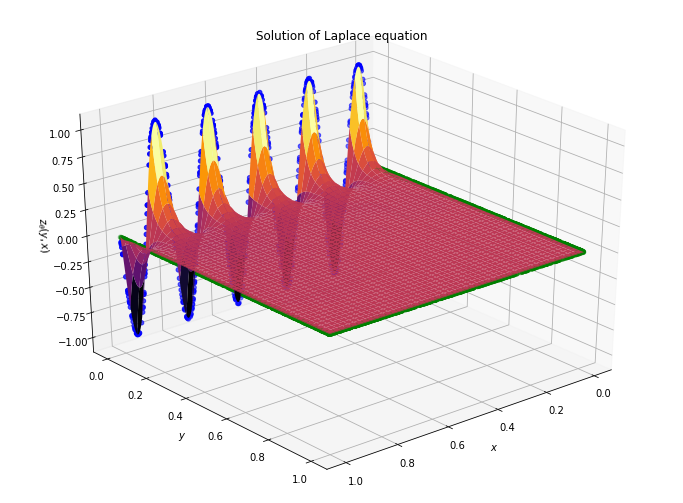

In [15]:
############################# Plotting the result:
from mpl_toolkits.mplot3d import Axes3D

# Set up meshgrid
N = 600
yspace = np.linspace(lb[0], ub[0] , N + 1)
xspace = np.linspace(lb[1], ub[1] , N + 1)
Y, X = np.meshgrid(yspace, xspace)
Xgrid = np.vstack([Y.flatten(),X.flatten()]).T  
zpred = model(tf.cast(Xgrid,DTYPE))   
Z = zpred.numpy().reshape(N+1,N+1)  

fig = plt.figure(figsize=(12,9))
#fig.set(figwidth = 12, figheight = 9)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y, X, Z, cmap='inferno');
ax.view_init(35,35)

ax.scatter3D(y_b, x_b, z_b, color = 'blue')
ax.scatter3D(y_b1, x_b1, z_b1, color = 'green')
ax.scatter3D(y_b2, x_b2, z_b2, color = 'green')
ax.scatter3D(y_b3, x_b3, z_b3, color = 'green')


ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z_\\theta(y,x)$')
ax.set_title('Solution of Laplace equation');
ax.view_init(azim = 50)